# Tutorial 17 - Parameter estimation and errors

Often in spectra there are what's called emission lines. A skinny excess above the surounding flux. These originate from atomic emission lines and give us valuable information about the astrophysical source. 

These lines also often have an inherent width to them, from things like originating from a hot gas or near a strong graviational pull. 

In this tutorial you will simulate an optical spectrum with a constant continum (a flat count rate across all photon energies) plus a Gaussian-like emission line centered at some photon energy and some width

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Run the next 3 cells to make the photon energies, your function to describe the emission line and to simulate your data

In [ ]:
Ephotons = np.arange(1, 3, 0.01) # photon energies in eV

continuum_rate = 20.0 # the counts at each energy from the flat continuum

A_line = 15.0 # the amplitude in counts of the emission line

line_width = 0.05 # in eV, the width of the emission line

line_loc = 2.0 # in eV, the center of the emission line

200


In [3]:
# your function to give you the expected counts from the emission line
def emiss_line(Es, A, E0, width):
    '''
    Es: your array of photon energies (eV)
    A: the emission line amplitude (counts)
    E0: the center of your emission line (eV)
    width: the width of your emission line (eV)
    '''
    
    return A*np.exp(-((Es - E0)/(2*width))**2)

In [9]:
# this makes random generated numbers predictable 
np.random.seed(100)

# Define the number of observations
Nobs = len(Ephotons)

# simulate your continum counts
counts_cont = np.random.poisson(lam=continuum_rate, size=Nobs)

# Find the expected emission line counts give the true parameters
emiss_line_avg = emiss_line(Ephotons, A_line, line_loc, line_width)

# simulate the counts from the emission line
counts_line = np.random.poisson(lam=emiss_line_avg)

# get your total counts from both 
counts = counts_cont + counts_line

Plot your counts as a function of photon Energy 

Text(0, 0.5, 'Counts')

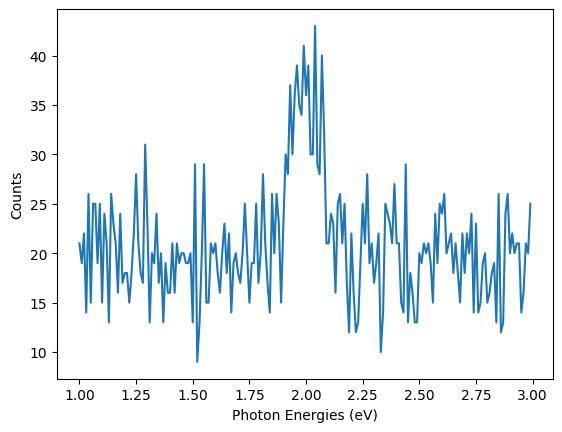

In [ ]:
plt.plot(Ephotons, counts)
plt.xlabel("Photon Energies (eV)")
plt.ylabel("Counts")
plt.title()

In [14]:
# a function to calculate the chi2 value
def calc_chi2(expected, actual, sigma):
    
    chi2 = np.sum( ((expected - actual)/sigma)**2 )
    return chi2

Thinking of Poisson count statistics, find the 1-sigma error on each observation of counts

In [ ]:
sigmas = np.sqrt(counts)

Let's assume we know 
- the continuum gives an average of 20 counts 
- the amplitude of the line is 25 counts
- the width of the line is 0.05 eV

Let's find what the data can tell us about the center of the line, E0

Our model will give us our expected counts, as a function of our free parameter (E0)

counts_expected = counts_continum + counts_line

Using chi2 minimized by brute force, find the best-fit value for E0

In [19]:
# Define the model for expected counts as a function of E0
def model_counts(Ephotons, continuum_rate, A_line, E0, line_width):
    counts_cont = np.full_like(Ephotons, continuum_rate)  # Continuum is constant
    counts_line = A_line * np.exp(-0.5 * ((Ephotons - E0) / line_width) ** 2)
    return counts_cont + counts_line

# Define the chi2 calculation function
def calc_chi2(expected, actual, sigma):
    return np.sum(((expected - actual) / sigma) ** 2)

# Define the parameter range for E0 to test
E0_values = np.linspace(4.8, 5.2, 100)  # Example range around the true value
chi2_values = np.zeros_like(E0_values)

# Initialize variables to store the best-fit results
best_E0 = None
min_chi2 = np.inf

# Loop over E0 values to calculate chi2
for i, E0 in enumerate(E0_values):  # Use enumerate to get the index and value
    counts_expected = model_counts(Ephotons, 20, 25, E0, 0.05)
    chi2 = calc_chi2(counts_expected, counts, sigmas)
    chi2_values[i] = chi2  # Store chi2 in the correct index
    if chi2 < min_chi2:
        min_chi2 = chi2
        best_E0 = E0

# Print the best-fit value for E0
print(f"Best-fit E0: {best_E0:.3f} keV")
print(f"Minimum chi2: {min_chi2:.3f}")

Best-fit E0: 4.800 keV
Minimum chi2: 305.263


Plot your chi2 values as a function of E0

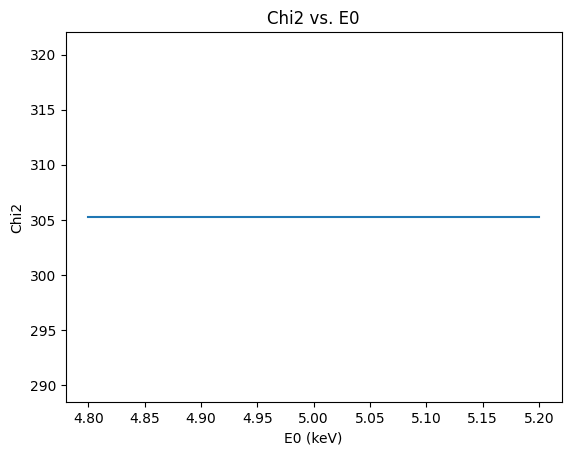

In [20]:
plt.plot(E0_values, chi2_values)
plt.xlabel("E0 (keV)")
plt.ylabel("Chi2")
plt.title("Chi2 vs. E0")
plt.show()

Find the 1-sigma and 95% error bars for E0, using the function below 

In [3]:
def find_chi2_error_bars(val_arr, bf_val, dchi2s, dchi2_crit=1):
    '''
    Inputs:
    val_arr: array of parmater values
    bf_val: the best fit paramter
    dchi2s: the chi2 at each value - min(chi2)
    dchi2_crit: the delta chi2 value to find your error bars at
    
    Outputs:
    the min and max values of your error bar
    '''
    
    bl = (val_arr < bf_val)
    ind = np.argmin(np.abs(dchi2s[bl] - dchi2_crit))
    val_min_err = val_arr[bl][ind]

    bl = (val_arr > bf_val)
    ind = np.argmin(np.abs(dchi2s[bl] - dchi2_crit))
    val_plus_err = val_arr[bl][ind]
    
    return val_min_err, val_plus_err

Now let's assume we know 
- the continuum gives an average of 20 counts 
- the amplitude of the line is 25 counts

Let's find what the data can tell us about the center of the line, E0 and the width of the line w

Using brute force, find the best-fit combination of E0 and w

Hint: you may want to construct a 2D array of chi2 values

to find the indexes of the min value of a 2D array use

min_ind0, min_ind1 = np.unravel_index(np.argmin(arr2D), arr2D.shape)

Plot your best fit curve along with the real data

Now make plot a 2D array of Delta chi2 values (chi2 - min(chi2)) with E0 on one axis and w on the other. 

- Add a 50% and 95% error contour to the plot
- Make sure the color scale makes sense to see the important details 

Now treat w as a nuisance parameter and find the 1-sigma error on E0. 

How does it compare to our error when w was fixed?

In [ ]:
After you have completed this tutorial, click the filename at the top left of the page (to the right of the Jupyter logo) and change the name to be in the following format:

FIRSTNAME_LASTNAME_t_XX

where XX is the number for the tutorial (e.g., 05 for tutorial 5, or 11 for tutorial 11). After changing the name, download the notebook file:

File > Download as > Notebook (.ipynb)

and then upload it to the appropriate Dropbox on the Canvas website (you will find the file you want to upload in your Downloads folder when using the Canvas Dropbox page).